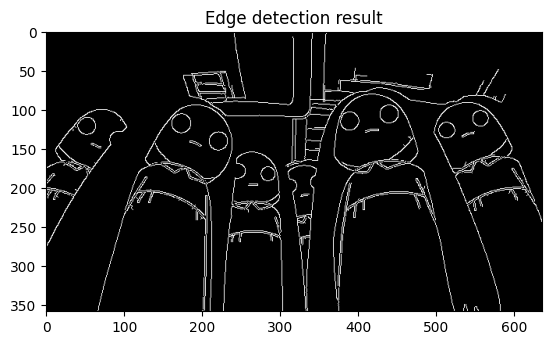

Number of Contours found = 40


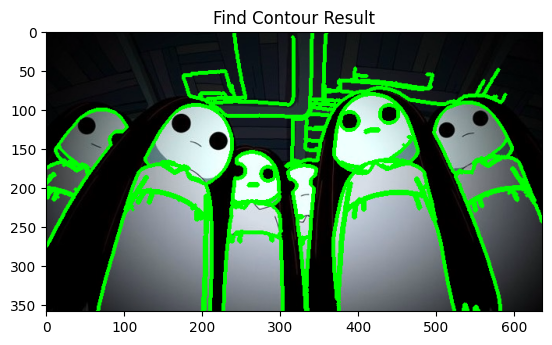

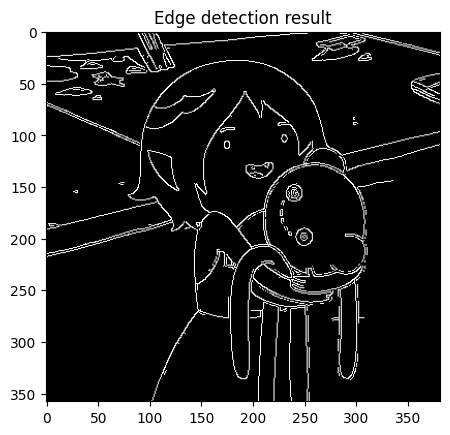

Number of Contours found = 99


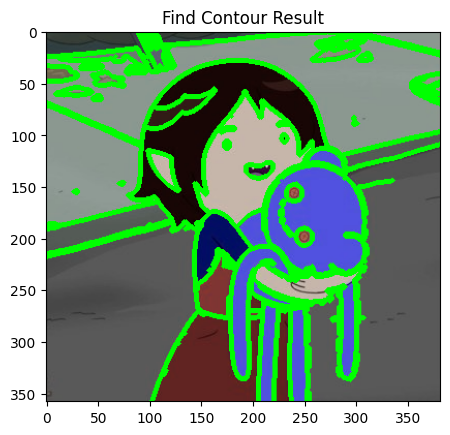

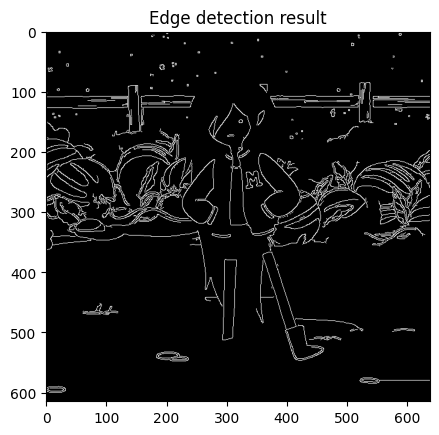

Number of Contours found = 141


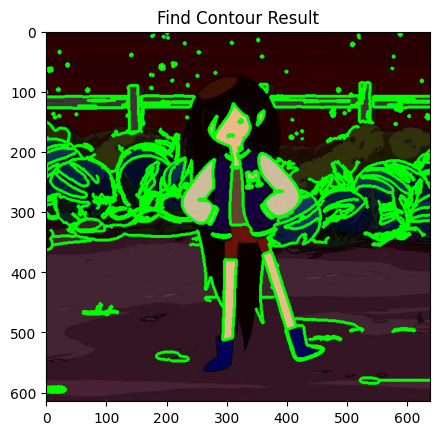

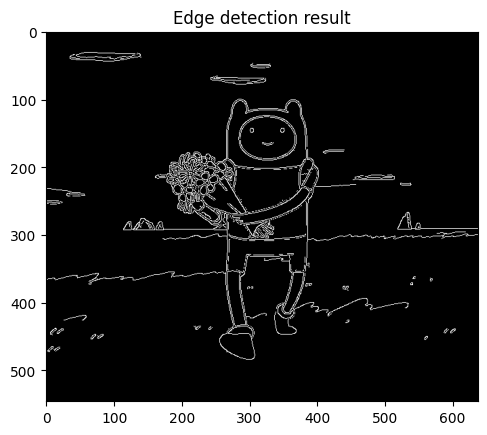

Number of Contours found = 217


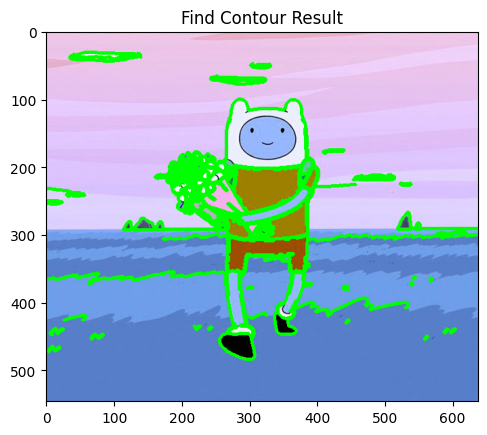

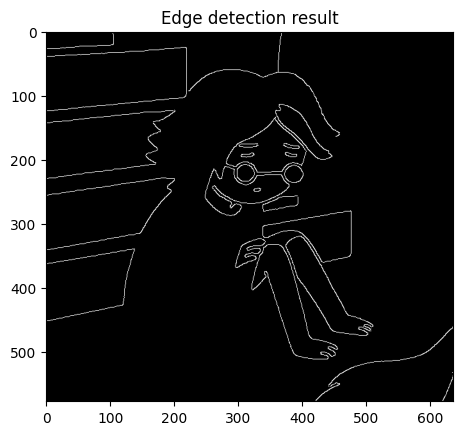

Number of Contours found = 22


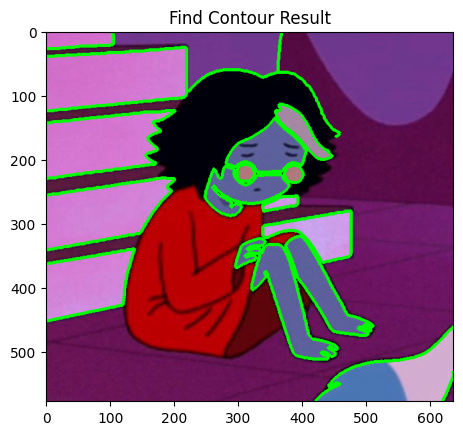

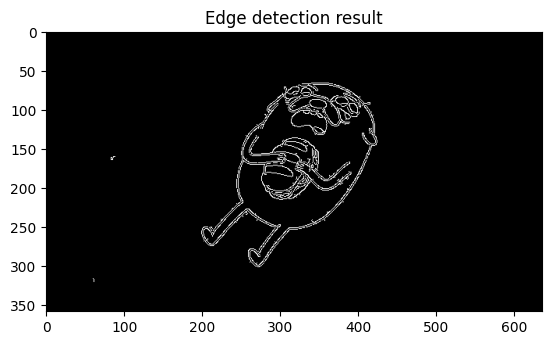

Number of Contours found = 38


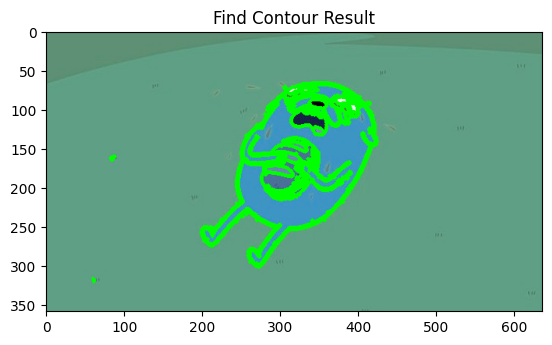

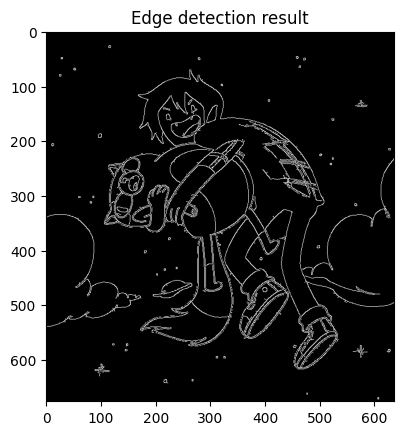

Number of Contours found = 237


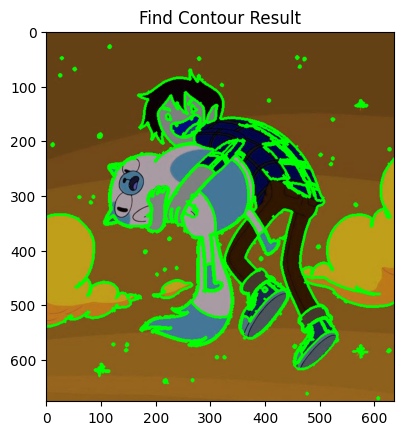

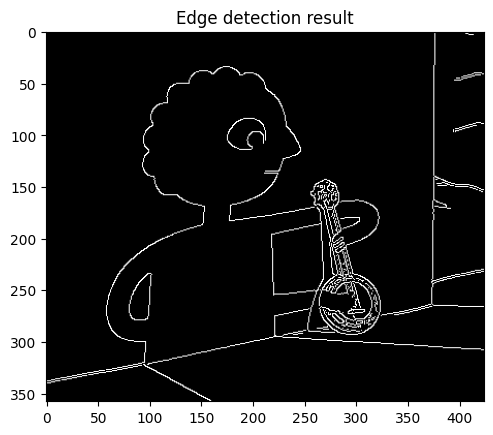

Number of Contours found = 20


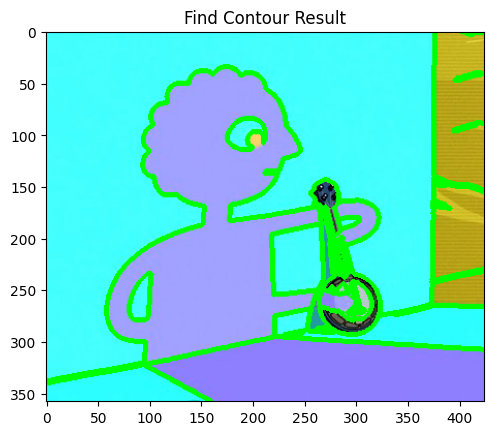

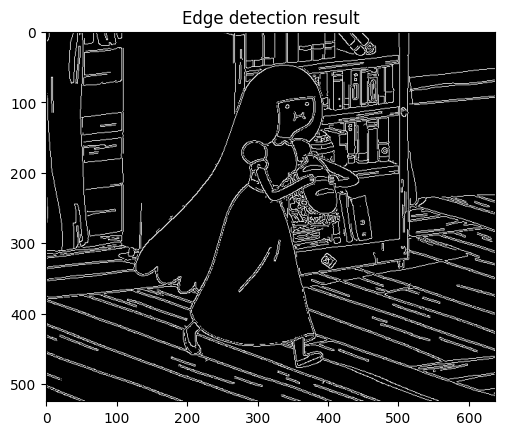

Number of Contours found = 381


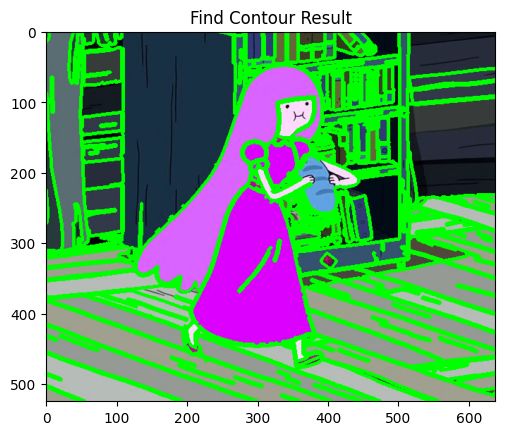

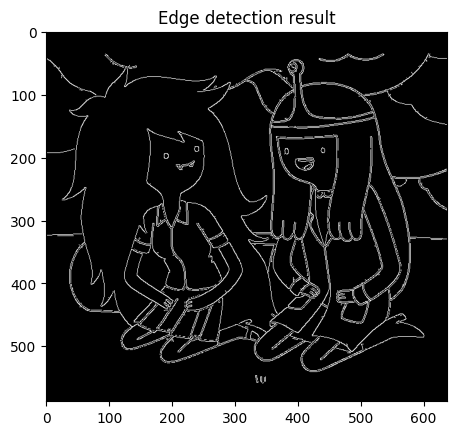

Number of Contours found = 205


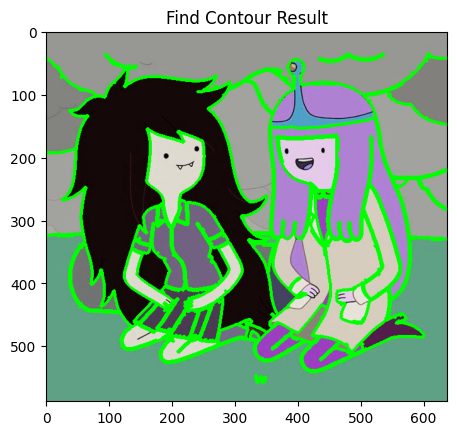

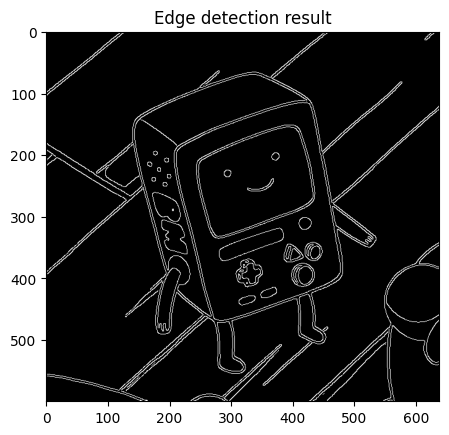

Number of Contours found = 44


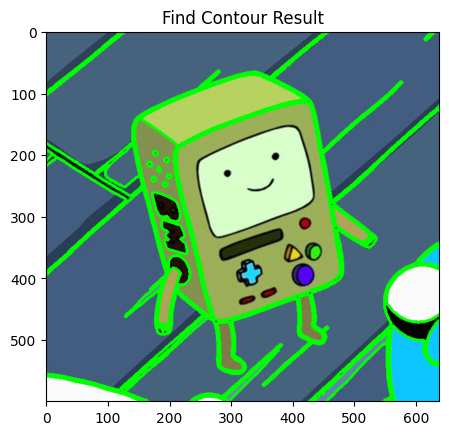

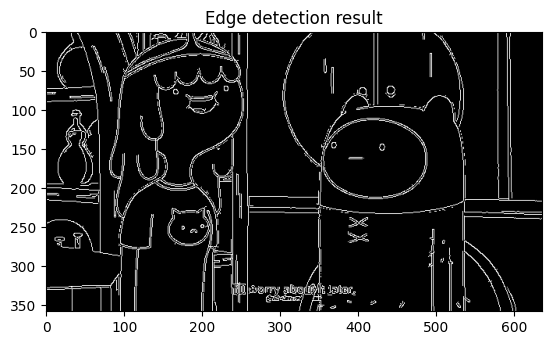

Number of Contours found = 205


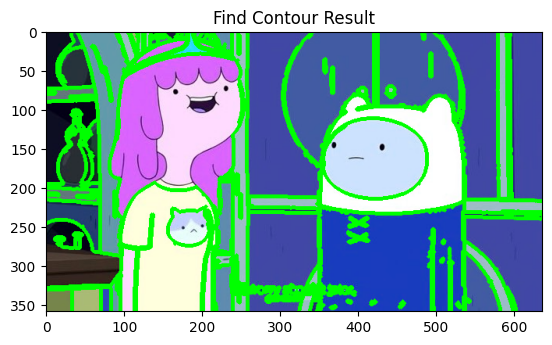

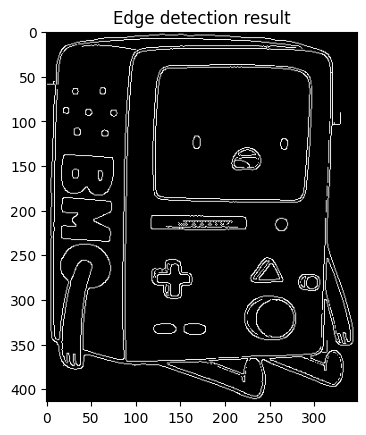

Number of Contours found = 1


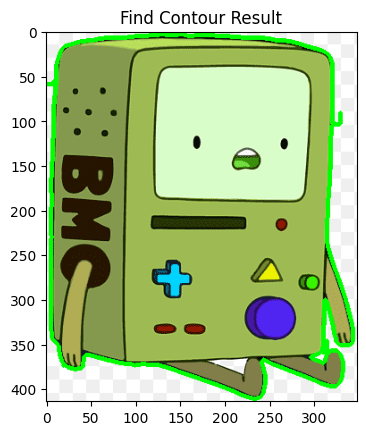

In [4]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Convert images to grayscale
def colorToGray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Implement canny edge detection to image
def cannyEdgeDetection(image):
    return cv2.Canny(image, 30, 200)

# Container for images from dataset
images = []

# Read image from dataset and add to images container
for i in range(1, 14):
    images.append(cv2.imread("ZCS-138-CAPSTONE/dataset/a" + str(i) + (".jpg" if i !=13 else ".png")))

# apply colorToGray function to each image in dataset
gray = []
for image in images:
    gray.append(colorToGray(image))

# apply cannyEdgeDetection function to grayscaled images
edged = []
for image in gray:
    edged.append(cannyEdgeDetection(image))

# List of list of Contours
overallContours = []

# For every edged image, find the contours and overlay it on original image
for edgedim, im in zip(edged, images):
    # Find contour
    contours, hierarchy = cv2.findContours(edgedim, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # Add contour list to overall list of list contours
    overallContours.append(contours)

    # Show result of edge detection algorithm
    plt.imshow(edgedim, cmap = "gray")
    plt.title(f'Edge detection result')
    plt.show()

    # Overlay original image with contours
    cv2.drawContours(im, contours, -1, (0, 255, 0), 3) 

    # Show result of contour finding
    print("Number of Contours found = " + str(len(contours)))
    plt.imshow(im, cmap = 'gray')
    plt.title(f'Find Contour Result')
    plt.show()

m > k in contour 0
Invalid image
m > k in contour 14
m > k in contour 15
m > k in contour 17
m > k in contour 18
m > k in contour 19
m > k in contour 20
m > k in contour 25
m > k in contour 28
m > k in contour 29
m > k in contour 31
m > k in contour 32
m > k in contour 34
m > k in contour 36
m > k in contour 37
m > k in contour 39
m > k in contour 40
m > k in contour 55
m > k in contour 57
Invalid image
Invalid image
Invalid image
m > k in contour 0


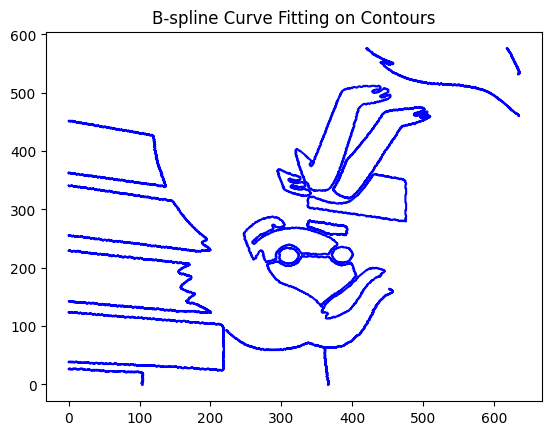

Invalid image
m > k in contour 11
m > k in contour 19
m > k in contour 27
Invalid image


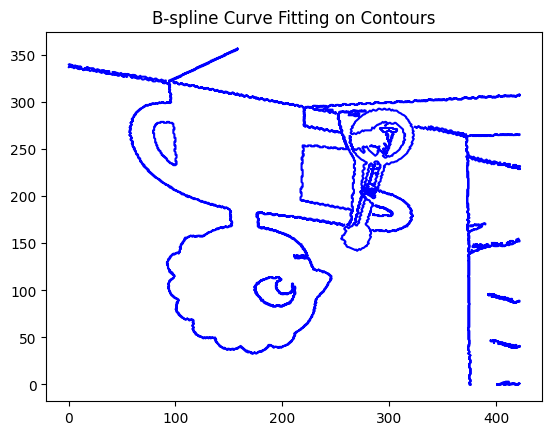

m > k in contour 4
m > k in contour 5
m > k in contour 9
m > k in contour 10
m > k in contour 25
m > k in contour 32
m > k in contour 39
m > k in contour 40
m > k in contour 43
m > k in contour 46
m > k in contour 49
m > k in contour 50
m > k in contour 51
m > k in contour 53
m > k in contour 54
m > k in contour 58
m > k in contour 60
m > k in contour 61
m > k in contour 63
m > k in contour 64
m > k in contour 66
m > k in contour 68
m > k in contour 71
m > k in contour 77
m > k in contour 78
m > k in contour 79
m > k in contour 81
m > k in contour 83
m > k in contour 89
m > k in contour 97
m > k in contour 98
m > k in contour 99
m > k in contour 105
m > k in contour 120
m > k in contour 123
m > k in contour 125
m > k in contour 130
m > k in contour 132
m > k in contour 142
m > k in contour 151
m > k in contour 153
m > k in contour 157
m > k in contour 161
m > k in contour 177
m > k in contour 181
Invalid image
m > k in contour 7
Invalid image
m > k in contour 6
m > k in contour 38


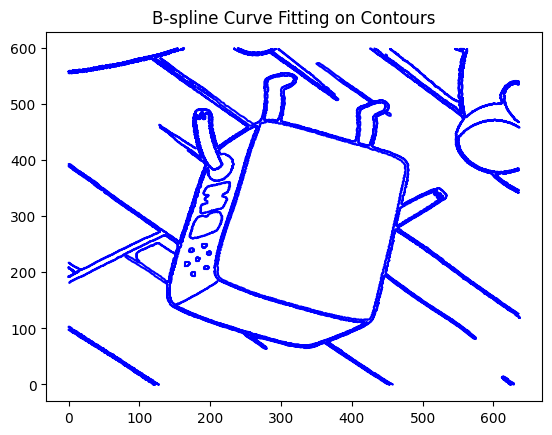

m > k in contour 3
m > k in contour 10
m > k in contour 16
m > k in contour 18
m > k in contour 20
m > k in contour 32
m > k in contour 34
m > k in contour 39
m > k in contour 41
m > k in contour 50
m > k in contour 56
m > k in contour 59
Invalid image


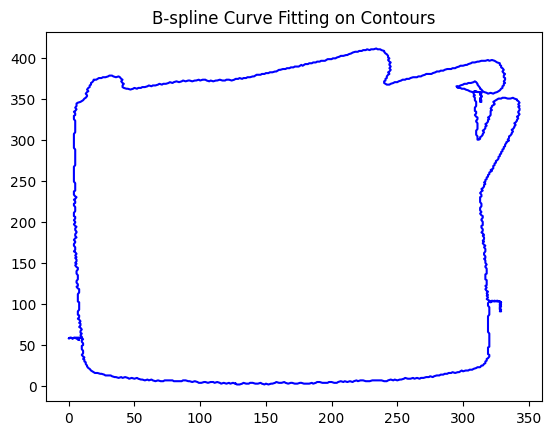

In [6]:
# B-spline curve fitting for ever contour
for contours in overallContours:
    try:
        # Container for individual curves
        curves = []    

        for i, contour in enumerate(contours):
            try:
                # Extract x and y coordinates of the contour points
                x, y = contour[:, 0, 0], contour[:, 0, 1]    

                # Fit B-spline curve to the contour points
                tck, u = splprep([x, y], s=3, per=True)

                # Evaluate the B-spline curve and optimize
                u_new = np.linspace(u.min(), u.max(), 1000)
                x_new, y_new = splev(u_new, tck)

                # Reconstruct the new x and y values to draw into image
                curve_points = np.column_stack((x_new.astype(int), y_new.astype(int)))
                curve_points = curve_points.reshape((-1, 1, 2))

                curves.append(curve_points)
            except TypeError:
                print(f'm > k in contour {i}')
                continue

        for curve in curves:
            x, y = curve[:, 0, 0], curve[:, 0, 1]
            plt.plot(x, y, 'b-', label='B-spline Curve')

        plt.title('B-spline Curve Fitting on Contours')
        plt.show()
    except ValueError:
        print('Invalid image')
        continue